# lecture fichier source : petit-duc.mp3


In [1]:
from pygame import mixer  # Load the popular external library

mixer.init()
mixer.music.load('petit-duc.mp3')
mixer.music.play()

ModuleNotFoundError: No module named 'pygame'

In [2]:
import os
os.startfile('petit-duc.mp3') 

# transformation en wav : petit-duc.wav

https://audio.online-convert.com/fr/convertir-en-wav

# visualisations

## calcul freq rate

In [6]:
import wave
petit_duc = wave.open('petit-duc.wav')
print('Freq d\'échantillonage : {} Hz'.format(petit_duc.getframerate()))

Freq d'échantillonage : 44100 Hz


## visu sound wave

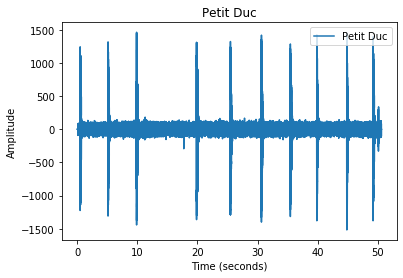

In [9]:
import matplotlib.pyplot as plt

# Open sound wave and read frames as bytes
petit_duc = wave.open('petit-duc.wav', 'r')
signal_pd = petit_duc.readframes(-1)
# Convert audio bytes to integers
soundwave_pd = np.frombuffer(signal_pd, dtype='int16')
# Get the sound wave frame rate
framerate_pd = petit_duc.getframerate()
# Find the sound wave timestamps
time_pd = np.linspace(start=0,
                      stop=len(soundwave_pd)/framerate_pd,
					  num=len(soundwave_pd))


# Setup the title and axis titles
plt.title('Petit Duc')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_pd, soundwave_pd, label='Petit Duc')


plt.legend(loc='upper right')
plt.show()

à peu près 1 cri toutes les 5 secondes

## passage en mono

In [51]:
from pydub import AudioSegment
sound = AudioSegment.from_wav("petit-duc.wav")
sound = sound.set_channels(1)
sound.export("petit-duc_mono.wav", format="wav")

C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\datacamp\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='petit-duc_mono.wav'>

## analyse spectrale

https://www.f-legrand.fr/scidoc/docimg/numerique/tfd/spectreson3/spectreson3.html

taux d'échantillonage : 44100 Hz
durée : 25.29 sec


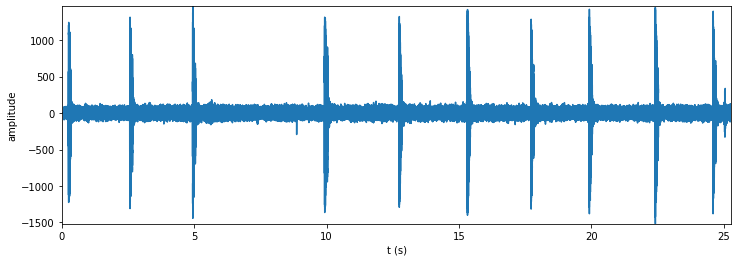

In [53]:
#Importation des modules :
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
from numpy.fft import fft
			
#Lecture du fichier WAV :

rate,data = wave.read('petit-duc_mono.wav')
n = data.size
duree = 1.0*n/rate
			
#Fréquence d'échantillonnage (en Hz) et durée de l'enregistrement :

print('taux d\'échantillonage : {} Hz'.format(rate))

print('durée : {:.2f} sec'.format(duree))

#Tracé du signal :

te = 1.0/rate
t = np.zeros(n)
for k in range(n):
    t[k] = te*k
ax = plt.figure(figsize=(12,4))
plt.plot(t,data)
plt.xlabel("t (s)")
plt.ylabel("amplitude") 
plt.axis([0,duree,data.min(),data.max()])
plt.show()

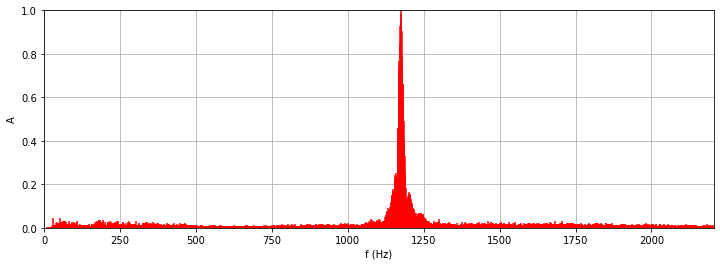

In [71]:
def tracerSpectre(data,rate,debut,duree):
    start = int(debut*rate)
    stop = int((debut+duree)*rate)
    spectre = np.absolute(fft(data[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    freq = np.zeros(n)
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    plt.vlines(freq[:round(n/10)],[0],spectre[:round(n/10)],'r')
    plt.xlabel('f (Hz)')
    plt.ylabel('A')
    plt.axis([0,0.5*rate/10,0,1])
    plt.grid()
    plt.show()
    return spectre
plt.figure(figsize=(12,4))
spectre = tracerSpectre(data,rate,0.0,3)

### isoler la frequence maxi

In [68]:
n = spectre.size
k = np.where(spectre == 1.0)[0]
1.0/n*rate*k

array([ 1174., 42926.])